In [2]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import os

In [2]:
directory = os.fsencode('/mnt/home/guptaagr/swift27/')
directories = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename[0]!='0':
        continue
    else:
        directories.append(filename)
directories=sorted(directories)

In [ ]:
filters = ['uw1', 'uw2', 'um2', 'uuu']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]
for obs_id in directories:
    for filterr in filters:
        mags = []
        for radius in radii:
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}.fits"):
                maghist = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}.fits")
                mag_data = Table(maghist[1].data)
                mags.append(mag_data['CORR_RATE'].mean())
            else:
                continue
#         if mags:
#             plt.plot(radii, mags, label=f"{obs_id}_{filterr}")
#             plt.legend();

In [ ]:
filters = ['uw1', 'uw2', 'um2', 'uuu']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]

# Iterate over the observation directories
for obs_id in directories:
    # Iterate over the filters
    for filterr in filters:
        # List comprehension to calculate mean magnitudes for available radii
        mags = [fits.open(f"{obs_id}/uvot/image/maghist{filterr}_{str(radius)}00_{obs_id}.fits")[1].data['MAG'].mean() 
                for radius in radii if os.path.exists(f"{obs_id}/uvot/image/maghist{filterr}_{str(radius)}00_{obs_id}.fits")]
        
        # Check if there are any magnitudes available
        if mags:
            # Plot the magnitudes for the filter and observation ID
            plt.plot(radii, mags, label=f"{obs_id}_{filterr}")

# Add a legend to the plot
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


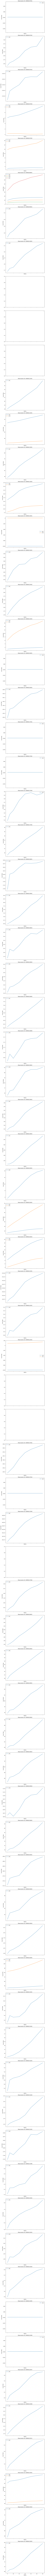

In [3]:
filters = ['uw1', 'uw2', 'um2', 'uuu']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]

# Calculate the number of plots needed based on the number of observation directories
num_plots = len(directories)

# Set up the subplots
fig, axs = plt.subplots(num_plots, 1, figsize=(8, 6*num_plots), sharex=True)

# Iterate over the observation directories
for i, obs_id in enumerate(directories):
    # Iterate over the filters
    for filterr in filters:
        # List comprehension to calculate mean magnitudes for available radii
        mags = [fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}.fits")[1].data['CORR_RATE'].mean() 
                for radius in radii if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}.fits")]
        
        # Check if there are any magnitudes available
        if mags:
            # Plot the magnitudes for the filter and observation ID in the respective subplot
            axs[i].plot(radii, mags, label=f"{filterr}")
            axs[i].set_title(f"Observation ID: {obs_id}")
            axs[i].set_xlabel('Radius')
            axs[i].set_ylabel('Count Rate')
    
    # Add a legend to each subplot
    axs[i].legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


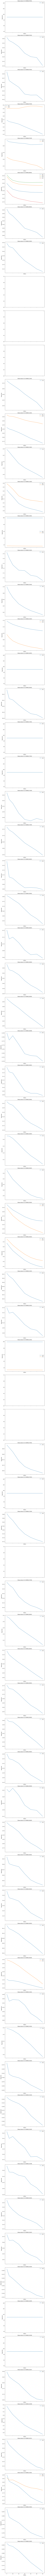

In [4]:
filters = ['uw1', 'uw2', 'um2', 'uuu']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]

# Calculate the number of plots needed based on the number of observation directories
num_plots = len(directories)

# Set up the subplots
fig, axs = plt.subplots(num_plots, 1, figsize=(8, 6*num_plots), sharex=True)

# Iterate over the observation directories
for i, obs_id in enumerate(directories):
    # Iterate over the filters
    for filterr in filters:
        # List comprehension to calculate mean magnitudes for available radii
        mags = [fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}.fits")[1].data['MAG'].mean() 
                for radius in radii if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}.fits")]
        
        # Check if there are any magnitudes available
        if mags:
            # Plot the magnitudes for the filter and observation ID in the respective subplot
            axs[i].plot(radii, mags, label=f"{filterr}")
            axs[i].set_title(f"Observation ID: {obs_id}")
            axs[i].set_xlabel('Radius')
            axs[i].set_ylabel('Magnitude')
    
    # Add a legend to each subplot
    axs[i].legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

In [24]:
cdir = os.getcwd()
obs_id = '00096113003'
mags = []
errs = []
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]
for radius in radii:
    maghist5 = fits.open(f"{obs_id}/uvot/image/maghist_um2_{str(radius)}00_{obs_id}.fits")
    mag_data = Table(maghist5[1].data)
    mags.append(mag_data['MAG'].mean())
    errs.append(mag_data['MAG_ERR'].mean())

In [25]:
mag_data

<Table length=1>
      MET         EXTNAME         TSTART     ... QUALFLAG PHOTFLAG CORRFLAG
    float64        str12         float64     ...  int32    int32    int32  
--------------- ------------ --------------- ... -------- -------- --------
641465078.24456 m2641464815I 641464815.64454 ...     -999        2        0

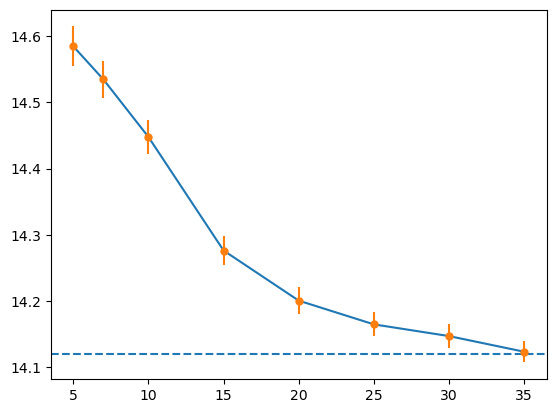

In [29]:
plt.plot(radii, mags)
plt.errorbar(radii, mags, yerr = errs, fmt='o', label='Pipeline', markersize=5)
plt.axhline(14.12, linestyle='--')

In [9]:
phot = pd.read_csv("All27_UV_OM_Photometry.csv")

In [10]:
phot = phot.drop(['Name.1','RA_decimal','Dec_decimal','V','V_err','V_flux','V_fluxerr','B','B_err','B_flux','B_fluxerr'], axis=1)

In [11]:
phot

Name SWIFT Target ID     UVM2  UVM2_err     UVM2_flux  \
0    1H0323+342           96107  15.9844   0.05000  1.870000e-15   
1           NaN             NaN  15.9851   0.03000  1.870000e-15   
2    1H1934-063           96108  14.9353   0.01500  4.930000e-15   
3         3C120           96109  14.8860   0.01500  5.150000e-15   
4         3C382           96110  15.3800   0.03000  3.260000e-15   
5       3C390.3           96111      NaN       NaN           NaN   
6        ARK120           96112  12.8286   0.00380  3.430000e-14   
7        ARK564           96113  14.1217   0.01686  1.040000e-14   
8   MCG-6-30-15           96114  16.7613   0.07090  9.160000e-16   
9       MRK1018           96115  17.3535   0.04260  5.310000e-16   
10       MRK110           96116  13.6628   0.01086  1.590000e-14   
11       MRK279           96117  14.1714   0.01430  9.960000e-15   
12          NaN             NaN  14.5009   0.01660  7.350000e-15   
13       MRK335           96118  13.6036   0.03010  1.680000e-14   
14          NaN             NaN  13.5329   0.00566  1.790000e-14   
15          NaN             NaN  13.6312   0.01109  1.640000e-14   
16       MRK509           96119  11.8647   0.00825  8.330000e-14   
17       MRK590           96120  14.5867   0.02000  6.790000e-15   
18          NaN             NaN      NaN       NaN           NaN   
19        MRK79           96121  13.6523   0.00520  1.610000e-14   
20       MRK841           96122  12.9545   0.00860  3.050000e-14   
21      NGC1365           96123  13.8118   0.01309  1.390000e-14   
22          NaN             NaN      NaN       NaN           NaN   
23          NaN             NaN      NaN       NaN           NaN   
24      NGC3783           96124  12.9466   0.00903  3.080000e-14   
25      NGC4051           96125  13.6987   0.00890  1.540000e-14   
26      NGC4151        96126_wt  10.4382   0.00455  3.100000e-13   
27      NGC4748           96127      NaN       NaN           NaN   
28          NaN             NaN      NaN       NaN           NaN   
29      NGC7469           96128      NaN       NaN           NaN   
30   PG0804+761           96129  12.3481   0.00238  5.340000e-14   
31          NaN             NaN      NaN       NaN           NaN   
32          NaN             NaN      NaN       NaN           NaN   
33   PG0844+349           96133  12.5530   0.00202  4.420000e-14   
34          NaN             NaN      NaN       NaN           NaN   
35   PG1426+015           96130      NaN       NaN           NaN   
36          NaN             NaN      NaN       NaN           NaN   
37      RBS1124           96131  15.3424   0.01770  3.390000e-15   
38          NaN             NaN      NaN       NaN           NaN   
39      UGC6728           96132  15.6309   0.02200  2.600000e-15   
40          NaN             NaN      NaN       NaN           NaN   
41          NaN             NaN      NaN       NaN           NaN   

    UVM2_fluxerr     UVW1  UVW1_err     UVW1_flux  UVW1_fluxerr     UVW2  \
0   8.620000e-17  15.5973  0.026000  2.300000e-15  5.560000e-17  15.9200   
1   5.950000e-17      NaN       NaN           NaN           NaN  16.1000   
2   6.840000e-17  14.3808  0.014900  7.040000e-15  9.720000e-17  14.7900   
3   7.310000e-17      NaN       NaN           NaN           NaN      NaN   
4   9.710000e-17      NaN       NaN           NaN           NaN      NaN   
5            NaN      NaN       NaN           NaN           NaN      NaN   
6   1.200000e-16  12.6003  0.006700  3.630000e-14  2.250000e-16      NaN   
7   1.620000e-16  13.8304  0.007400  1.170000e-14  7.980000e-17  14.0300   
8   5.980000e-17      NaN       NaN           NaN           NaN  16.9600   
9   2.080000e-17  16.4915  0.018200  1.010000e-15  1.690000e-17  17.1800   
10  1.590000e-16      NaN       NaN           NaN           NaN  14.2200   
11  1.310000e-16  14.2683  0.019500  7.810000e-15  1.400000e-16      NaN   
12  1.130000e-16  13.4655  0.007870  1.640000e-14  1.190000e-16      NaN   
13  4.650000e-16  13.4